In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import linear_model

In [2]:
df = pd.read_excel(r"C:\Users\dell\Desktop\Book1.xlsx")
df


,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [13]:
y = df['price']

KeyError: 'price'

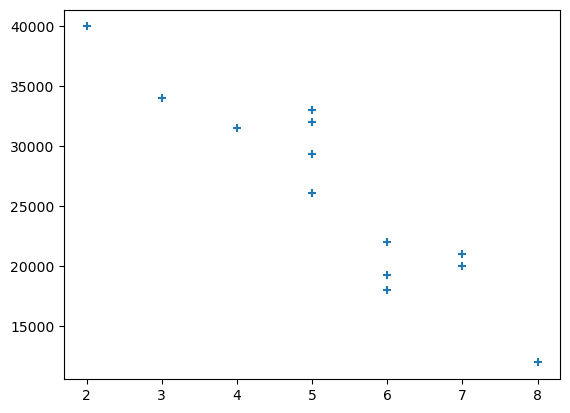

In [24]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'],marker = '+')


In [5]:
y = df['Sell Price($)']

In [6]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [9]:
df1 = df.drop(['Sell Price($)'],axis =1)
df1

,Car Model,Mileage,Age(yrs)
0,BMW X5,69000,6
1,BMW X5,35000,3
2,BMW X5,57000,5
3,BMW X5,22500,2
4,BMW X5,46000,4
5,Audi A5,59000,5
6,Audi A5,52000,5
7,Audi A5,72000,6
8,Audi A5,91000,8
9,Mercedez Benz C class,67000,6


In [10]:
dummy = pd.get_dummies(df1['Car Model'])
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [11]:
final = pd.concat([df1,dummy],axis =1)
final

,Car Model,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,6,0,1,0
1,BMW X5,35000,3,0,1,0
2,BMW X5,57000,5,0,1,0
3,BMW X5,22500,2,0,1,0
4,BMW X5,46000,4,0,1,0
5,Audi A5,59000,5,1,0,0
6,Audi A5,52000,5,1,0,0
7,Audi A5,72000,6,1,0,0
8,Audi A5,91000,8,1,0,0
9,Mercedez Benz C class,67000,6,0,0,1


In [12]:
final2 = final.drop(['Car Model','Mercedez Benz C class'],axis =1)
final2

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [15]:
model = linear_model.LinearRegression()


In [16]:
model.fit(final2,y)

LinearRegression()

In [18]:
model.score(final2,y)

0.9417050937281082

In [21]:
model.predict([[45000,4,0,0]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [37]:
import pickle
with open ('final_model_Car_Price','wb') as f :
    pickle.dump(model,f)